<a href="https://colab.research.google.com/github/paulrobustelli/CHEM101.6/blob/main/Butane_OpenMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hello there!**

This is a Jupyter notebook for running Molecular Dynamics (MD) simulations of Alkanes using the OpenMM engine 

---
---
# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    Anaconda (https://docs.conda.io/en/latest/miniconda.html)
2.    OpenMM (https://openmm.org/)
3.    Mdtraj (https://www.mdtraj.org/1.9.8.dev0/index.html)
5.    Numpy (https://numpy.org/)
6.    Matplotlib (https://matplotlib.org/)


In [3]:
import sys
import openmm as mm
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt


We're going to set-up a directory on our desktop to sore the input files needed for this simulation. 

These files are a pdb and a force field file for butane and ethane 

I'm going to make my course directory:
"/Users/paulrobustelli/desktop/Chem101_S24"

I made a subdirectory called: "Exercise0"

and another subdirectory "data":   
"/Users/paulrobustelli/desktop/Chem101_S24/Chem101_S24Exercise0/data"

and another for our output - commonly called an out directory or "outdir"
"/Users/paulrobustelli/desktop/Chem101_S24/Chem101_S24Exercise0/outdir"


In [4]:
workdir='/home/f0042vb/CHEM101.6/week1/'
datadir='/home/f0042vb/CHEM101.6/week1/data/'
outdir='/home/f0042vb/CHEM101.6/week1/outdir/'

In [5]:
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml' 

In [6]:
print(PDB_file_name)
print(forcefield_file_name)

/home/f0042vb/CHEM101.6/week1/data/butane.pdb
/home/f0042vb/CHEM101.6/week1/data/butane.gaff2.xml


In [7]:
pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

In [8]:
pdb

In [9]:
forcefield

In [10]:

from openmm import Platform
import openmm

# Print OpenMM version
print(f"OpenMM Version: {openmm.version.full_version}")

for i in range(Platform.getNumPlatforms()):
    platform = Platform.getPlatform(i)
    print(f"Platform: {platform.getName()}")
    if platform.getName() in ['CUDA', 'OpenCL']:
        properties = platform.getPropertyNames()
        if 'DeviceIndex' in properties:  # Checking if DeviceIndex property is present
            deviceIndex = platform.getPropertyValue(None, 'DeviceIndex')
            print(f"  Device Index: {deviceIndex}")
        if 'CudaPrecision' in properties:  # Example of getting CUDA precision if applicable
            cudaPrecision = platform.getPropertyValue(None, 'CudaPrecision')
            print(f"  CUDA Precision: {cudaPrecision}")

OpenMM Version: 8.0.0.dev-a780005
Platform: Reference
Platform: CPU
Platform: CUDA


ValueError: invalid null reference in method 'Platform_getPropertyValue', argument 2 of type 'OpenMM::Context const &'

In [17]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = mm.app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [18]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127868 kJ/mol
Potential energy after minimization is 5.295784483017471 kJ/mol


In [19]:
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picoseconds, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)

print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.295784483017471 kJ/mol
Potential energy after minimization is 5.295543508947829 kJ/mol


In [20]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(mm.app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,49.646046698910745,381.0854428510974


2000,34.8596507223137,212.7889602073066


In [21]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(mm.app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(10000)

Equilibrating...
3000,55.1678338412563,337.0221099057021
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
3000,55.1678338412563,337.0221099057021


4000,62.42387309174217,320.1790076041645
4000,62.42387309174217,320.1790076041645
5000,37.80279857384767,370.3388902503507
5000,37.80279857384767,370.3388902503507
6000,32.69758604105219,319.7158857889105
6000,32.69758604105219,319.7158857889105
7000,40.761879273461986,486.8967086618286
7000,40.761879273461986,486.8967086618286
8000,33.991600711918736,269.1010815327042
8000,33.991600711918736,269.1010815327042
9000,33.904430769973786,352.9967048937218
9000,33.904430769973786,352.9967048937218
10000,59.852297055999884,249.2939222493428
10000,59.852297055999884,249.2939222493428
11000,38.60718457037215,306.7016539024271
11000,38.60718457037215,306.7016539024271
12000,38.64644791828347,392.8177869568925
12000,38.64644791828347,392.8177869568925


In [22]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(mm.app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(mm.app.DCDReporter(outdir+'butane_test.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,40.7779209018978,226.72906738664668,0
500000,999.9999999901769,32.773801407795645,173.87111626208093,3.61e+04
750000,1499.9999999783536,53.858155996070536,282.08839259680457,3.61e+04
1000000,1999.9999999665301,45.03341071878107,288.88356696228686,3.58e+04
1250000,2499.9999999547067,41.34962479146634,209.26058882829398,3.55e+04
1500000,2999.9999999428833,70.15253222094924,368.6235079313204,3.54e+04
1750000,3499.99999993106,50.76403863148075,198.23755070357427,3.53e+04
2000000,3999.9999999192364,22.330792190105555,293.23844989548746,3.52e+04
2250000,4499.9999999992715,46.58653339958501,262.7226706848284,3.5e+04
2500000,5000.000000101135,50.99778948746612,307.9301756873056,3.49e+04
2750000,5500.000000202998,51.73435750202991,372.86974125212595,3.5e+04
3000000,6000.000000304862,58.545447035701834,337.36367365090797,3.49e+04
3250000,6500.000000406725,47.12876711

In [23]:
import mdtraj as md
traj = md.load(outdir+'butane_test.dcd', top=PDB_file_name)
traj

<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x7f66302a5c90>

In [22]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


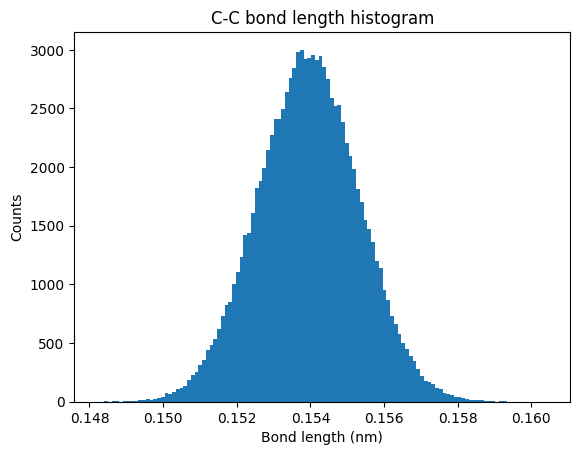

In [23]:
bond_indices = [4, 7] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

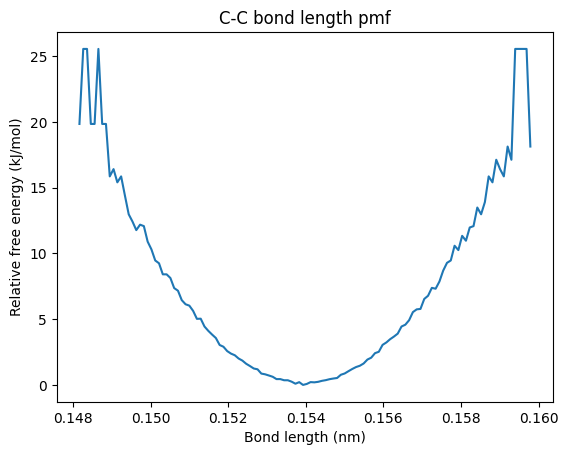

In [19]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
bondcounts[bondcounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(bondcounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()

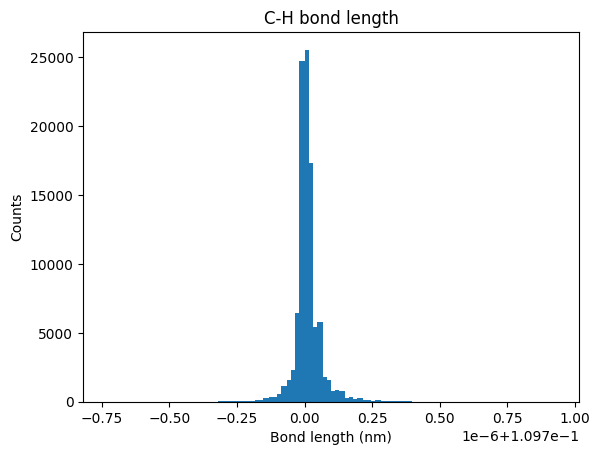

In [20]:
bond_indices = [4, 5] # many possibilities!
bondlength = md.compute_distances(traj, [bond_indices])

lengthcounts, binedges, otherstuff = plt.hist(bondlength, bins=100)
plt.title('C-H bond length')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

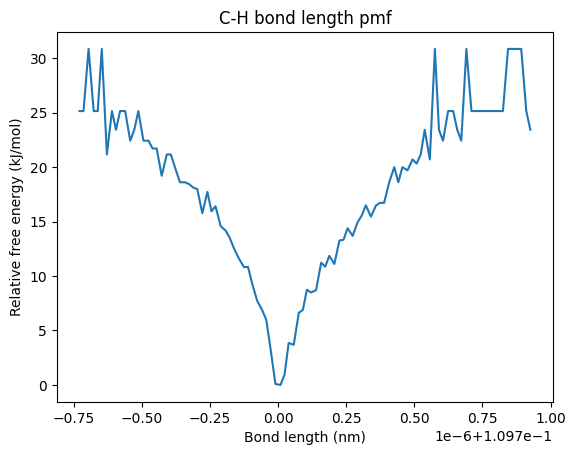

In [21]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
lengthcounts[lengthcounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(lengthcounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-H bond length pmf')
plt.show()

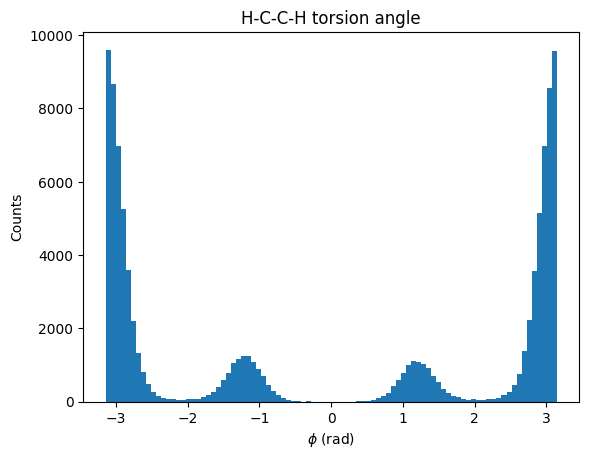

In [22]:
phi_indices = [0, 4, 7, 10] # atoms to define the torsion angle
phi = md.compute_dihedrals(traj, [phi_indices])

phicounts, binedges, otherstuff = plt.hist(phi, bins=90) # create a histogram with 90 bins
plt.title('H-C-C-H torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

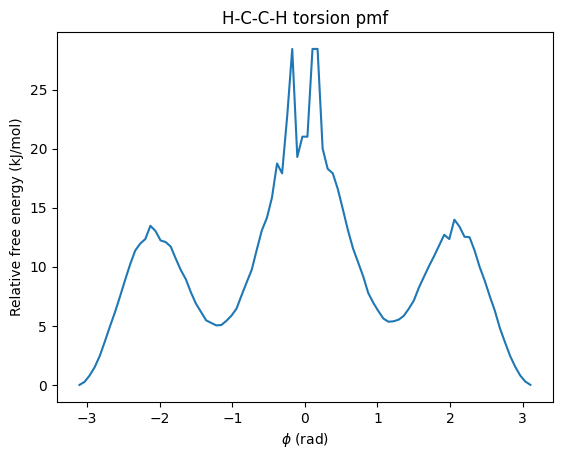

In [23]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('H-C-C-H torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

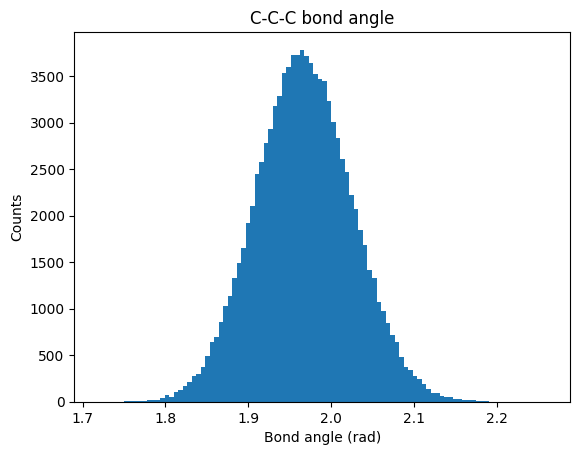

In [24]:
angle_indices = [0, 4, 7] # or could do [4, 7, 10]
bondangle = md.compute_angles(traj, [angle_indices])

anglecounts, binedges, otherstuff = plt.hist(bondangle, bins=100)
plt.title('C-C-C bond angle')
plt.xlabel('Bond angle (rad)')
plt.ylabel('Counts')
plt.show()

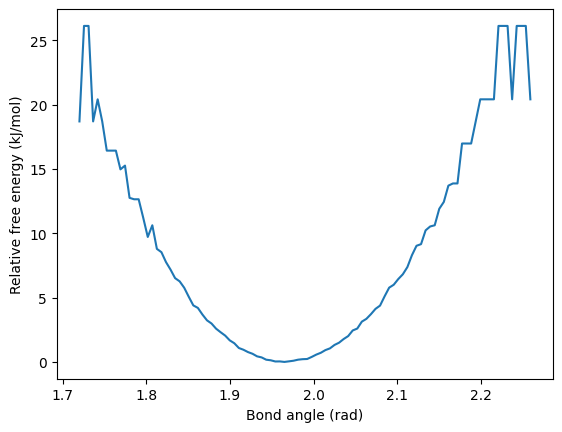

In [25]:
anglecounts[anglecounts==0] = 0.1
pmf = -kB*Temp*np.log(anglecounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2


plt.plot(bincenters, pmf)
plt.xlabel('Bond angle (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()